In [1]:
from root_pandas import read_root
from root_numpy import tree2array
import ROOT as r
import numpy as np
import pandas as pd
import matplotlib as mp
import matplotlib.pyplot as plt


Welcome to JupyROOT 6.12/06


In [2]:
def get_df(file, var):
    f = r.TFile('/eos/user/d/dvalsecc/VBS/VBSAnalysis/data/output_swan/'+file, "READ")
    tree = f.Get('mw_mjj')

    cuts = "(mu_eta< 2.1)&&(mu_pt > 20)&&(mjj_vjet > 65)&&(mjj_vjet < 105)&&(mjj_vbs>200)&&(deltaeta_vbs>2.5)&&(met > 20)"

    d = tree2array(tree, selection=cuts, branches=var )
    data = np.array(d.tolist(), dtype=float)
    df =  pd.DataFrame(data)
    df.columns = var
    return df


In [3]:
nn_vars1 = ["score_t0_v5", 'score_t1', 'score_t2', 'score_wjets_v5', "bveto_weights[1]"]
nn_vars2 = [ 'score_wjets_v2_04','score_wjets_v2_05', 'score_wjets_v2_06']

In [4]:
norm_ewk = 1.68876e+06
norm_wjets = 374160.
norm_ttbar = 196025.
norm_qcdww = 888793.
norm_singletop = 369152.

In [5]:
df = get_df("w+jets_btag_val.root", nn_vars1)
norm = norm_wjets
title = "W+jets sample"
samp = "Wjets"

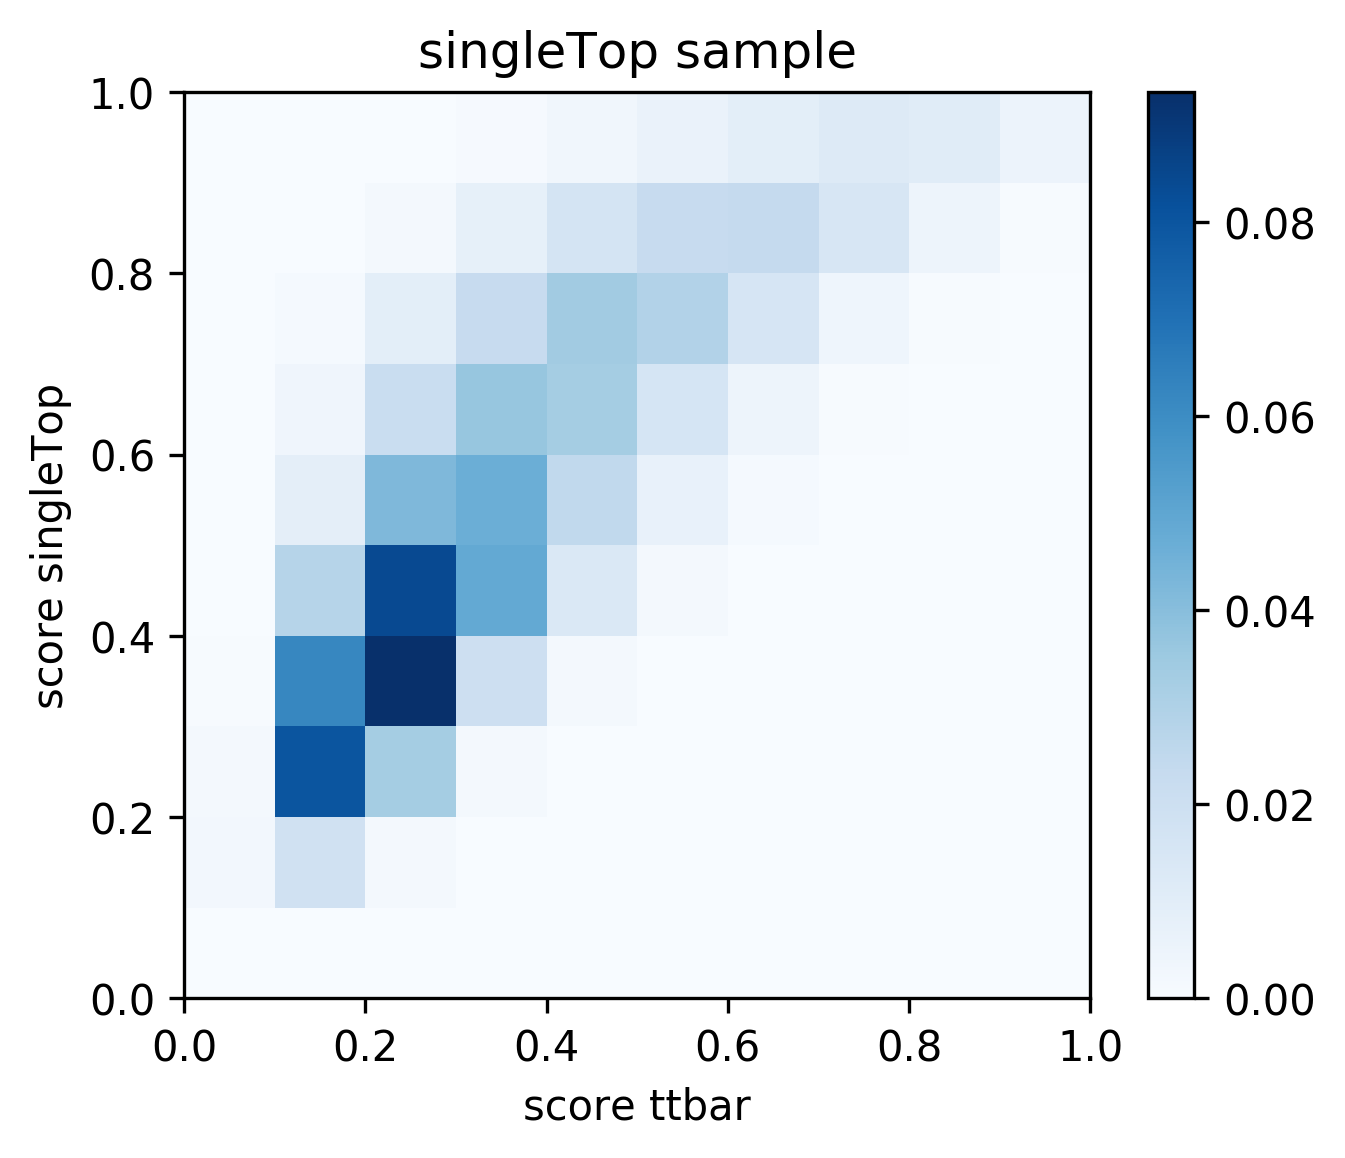

In [163]:
H, xedges, yedges = np.histogram2d(df.score_t2.values,df.score_t1.values, bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score ttbar")
plt.ylabel("score singleTop")
plt.savefig(samp + "_t2_t1.pdf")
plt.show()

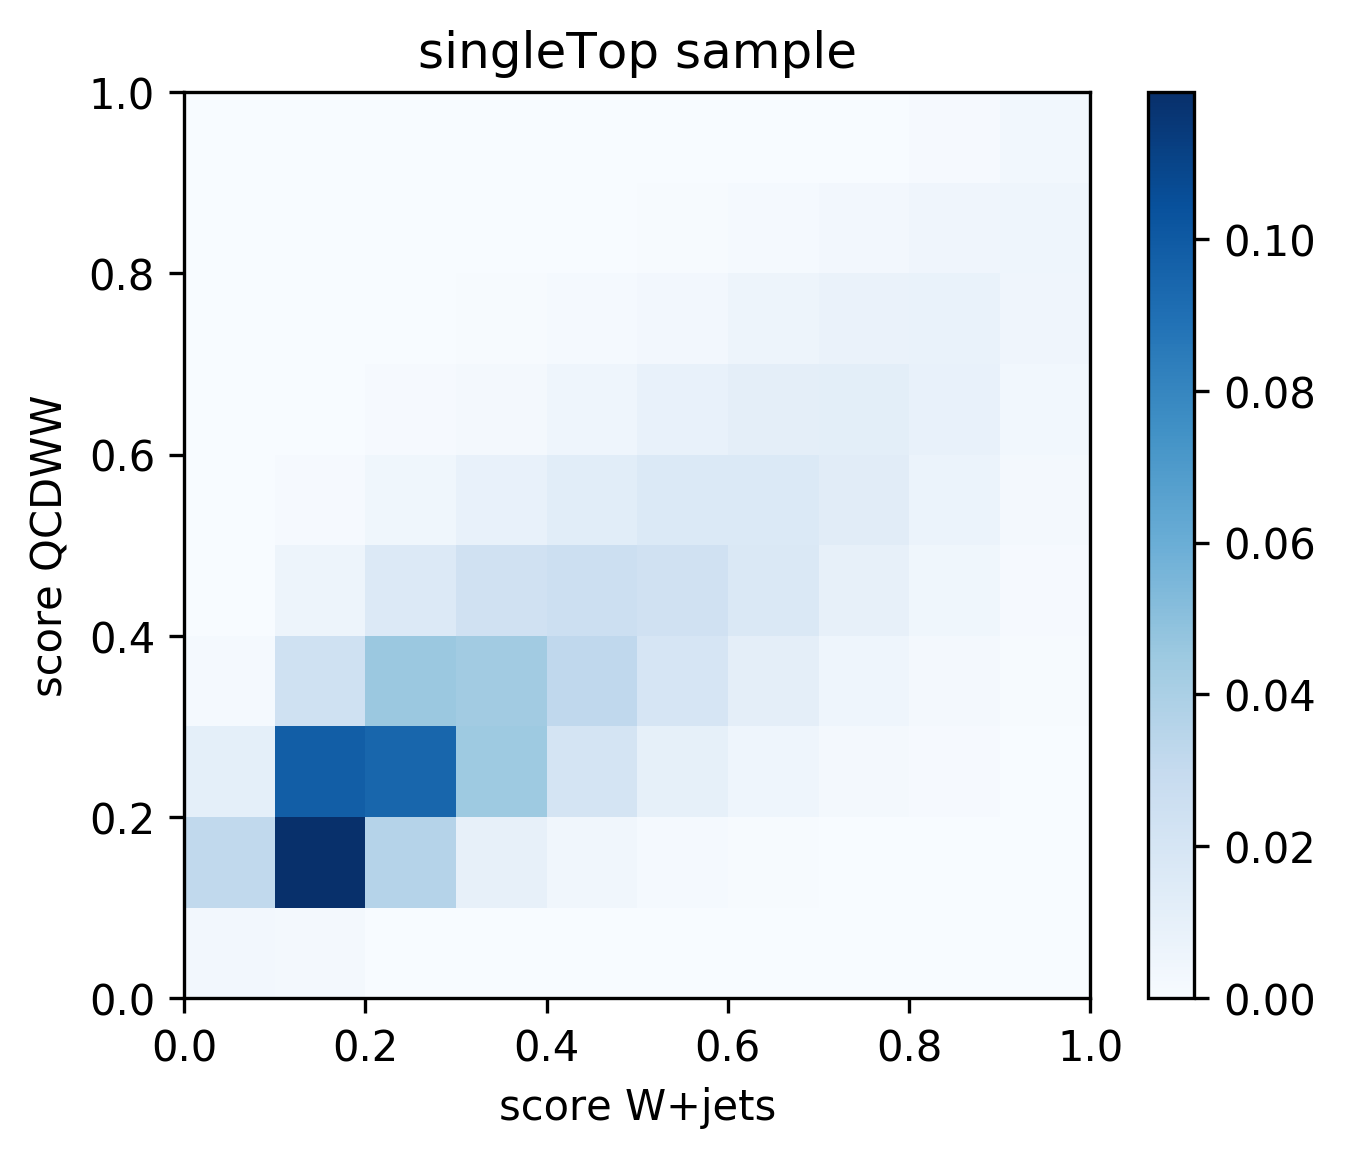

In [158]:
H, xedges, yedges = np.histogram2d(df.score_wjets_v5.values, df.score_t0_v5.values,bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score W+jets")
plt.ylabel("score QCDWW")
plt.savefig(samp + "_t0_wjets.pdf")
plt.show()

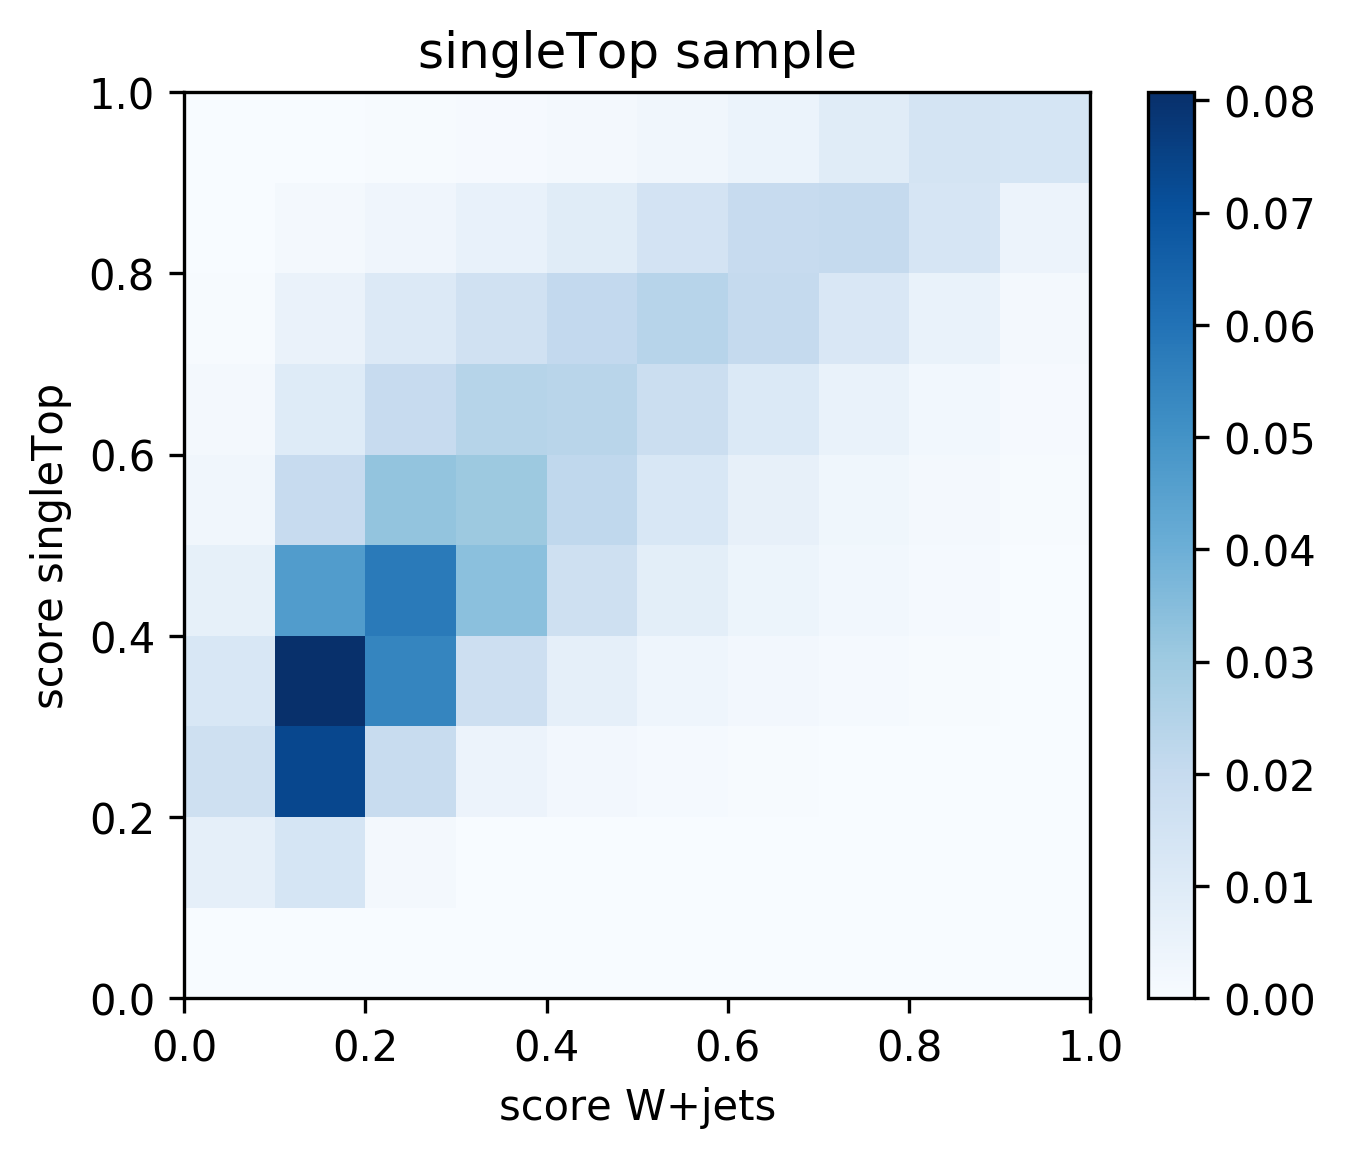

In [159]:
H, xedges, yedges = np.histogram2d(df.score_wjets_v5.values, df.score_t1.values,bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score W+jets")
plt.ylabel("score singleTop")
plt.savefig(samp + "_t1_wjet.pdf")
plt.show()

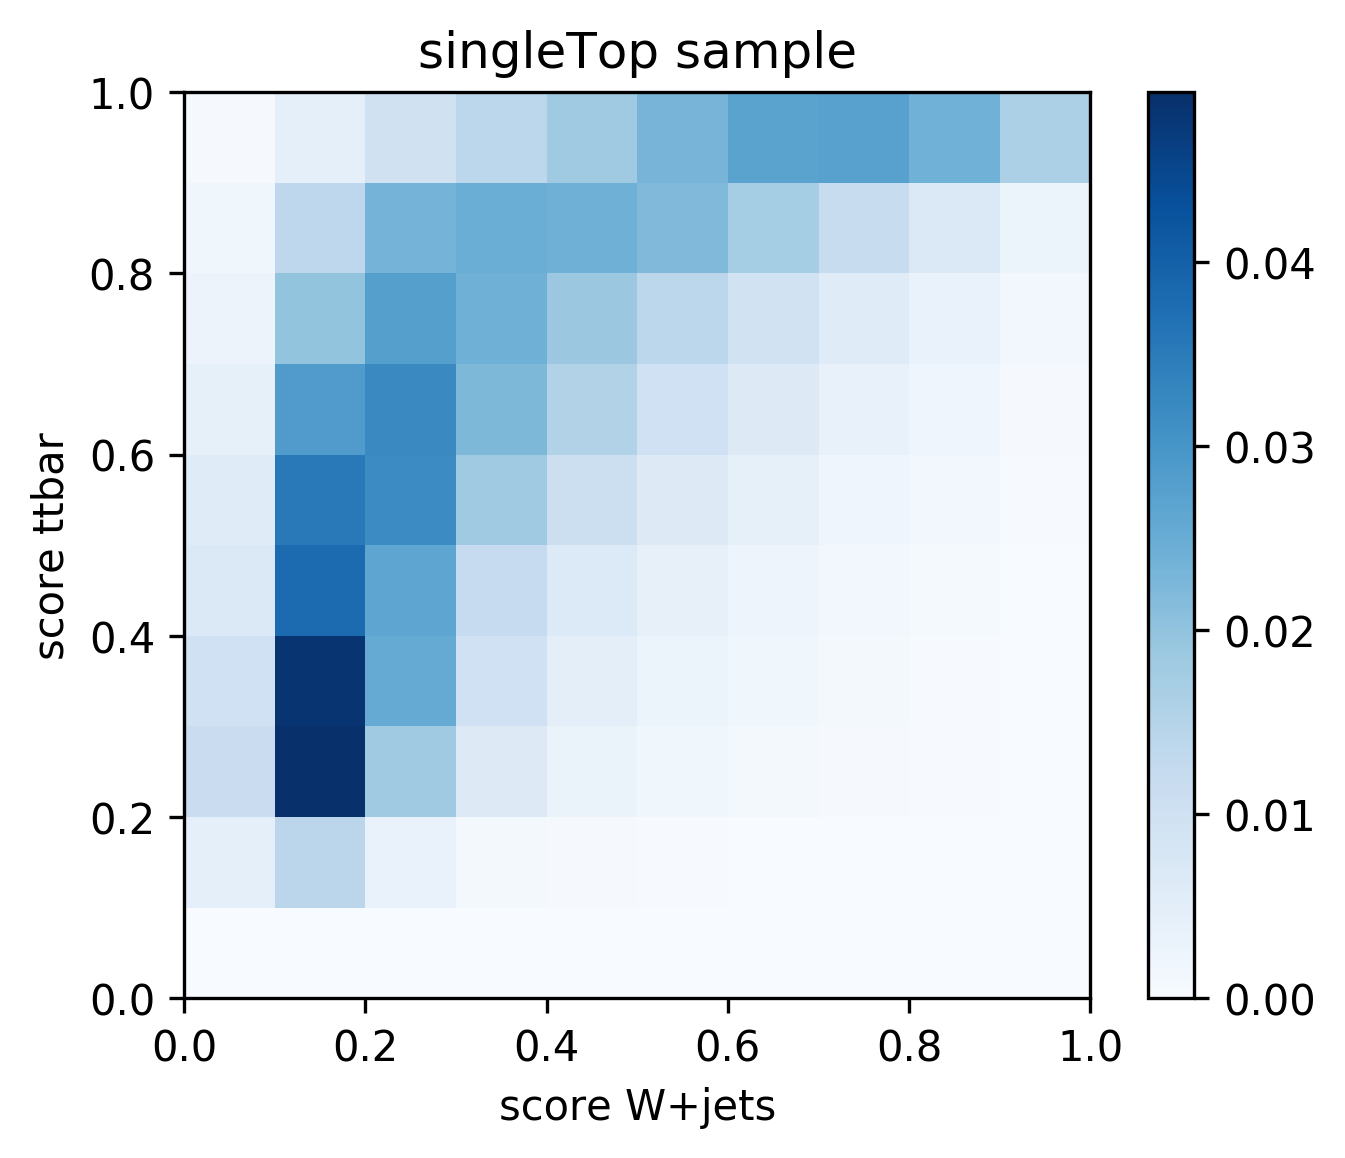

In [160]:
H, xedges, yedges = np.histogram2d(df.score_wjets_v5.values, df.score_t2.values,bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score W+jets")
plt.ylabel("score ttbar")
plt.savefig(samp + "_t2_wjets.pdf")
plt.show()

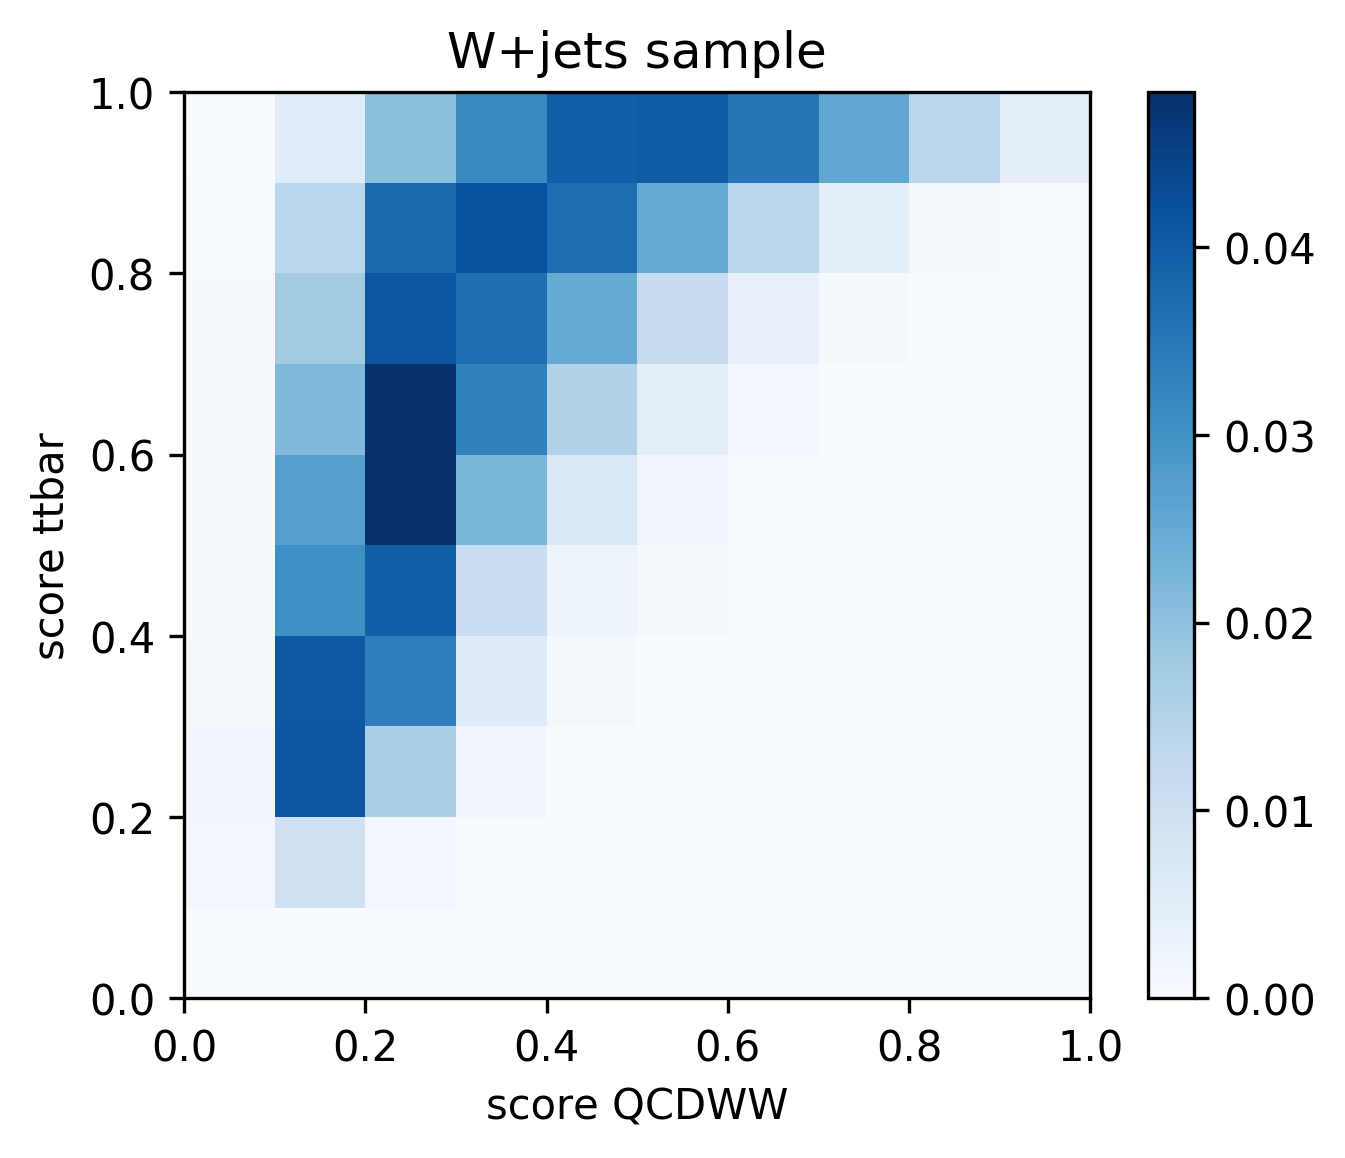

In [34]:
H, xedges, yedges = np.histogram2d(df.score_t0_v5.values, df.score_t2.values,bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score QCDWW")
plt.ylabel("score ttbar")
plt.savefig(samp + "_t0_t2.pdf")
plt.show()

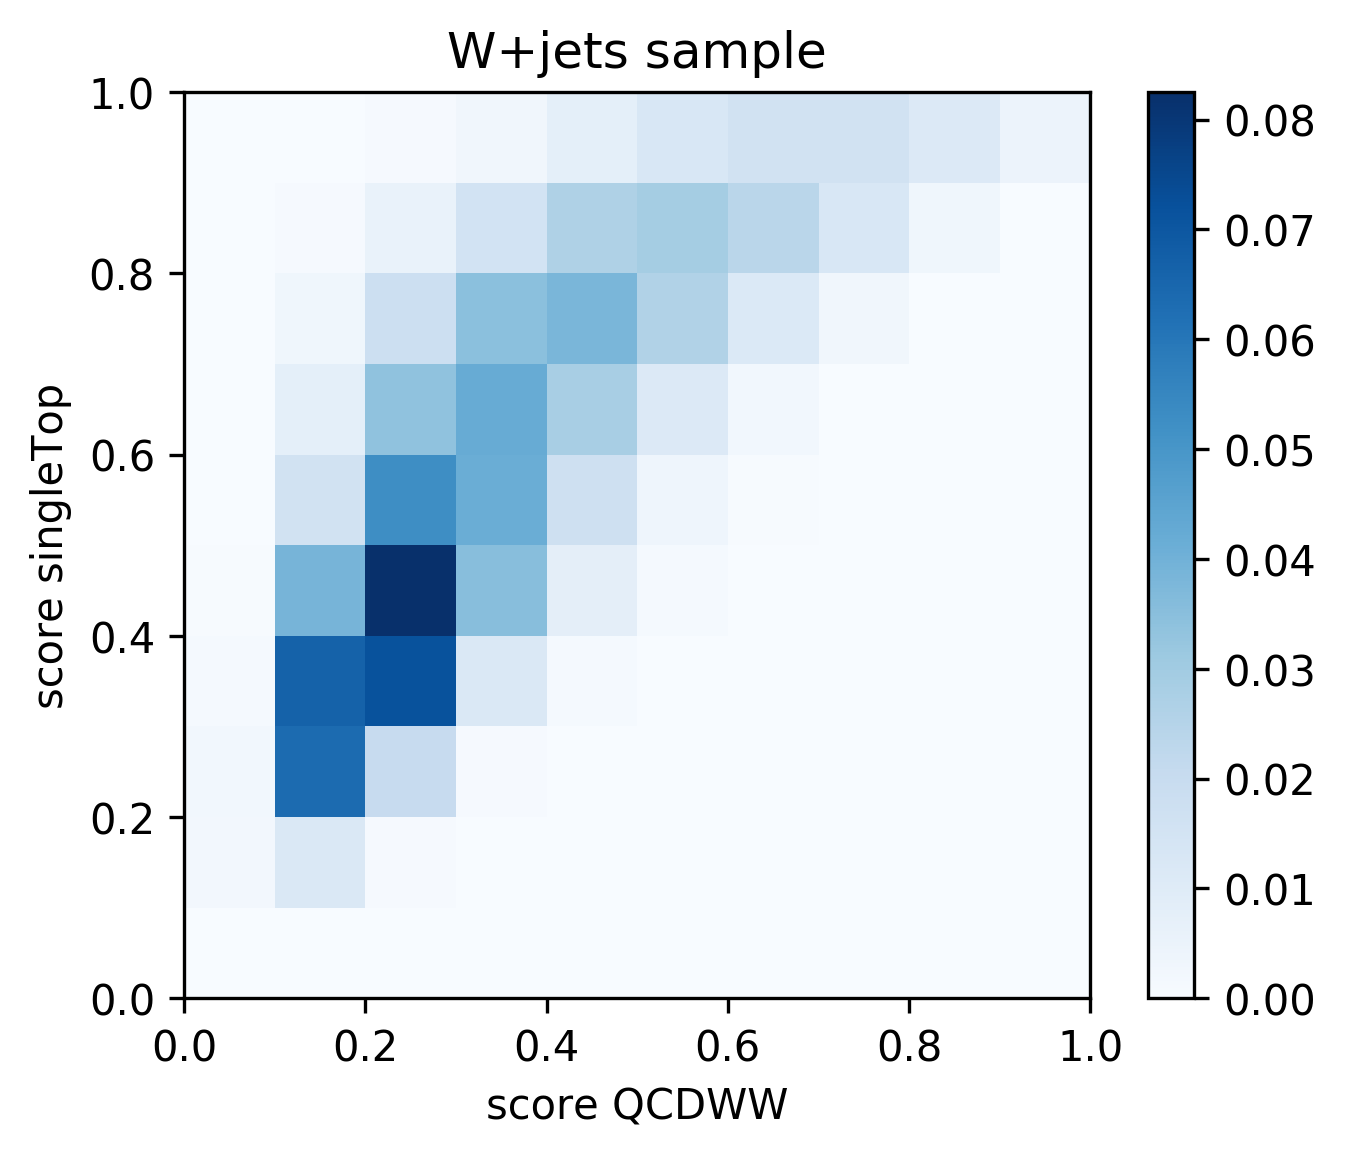

In [33]:
H, xedges, yedges = np.histogram2d(df.score_t0_v5.values, df.score_t1.values,bins=(10, 10), range=([0,1],[0,1]), weights=df["bveto_weights[1]"].values)
extent = [0,1,0,1]
H = H/ norm

plt.figure(figsize=(5,4), dpi=300)
plt.imshow(H.T, extent=extent, interpolation='nearest', cmap="Blues", origin="lower")
plt.colorbar()
plt.title(title)
plt.xlabel("score QCDWW")
plt.ylabel("score singleTop")
plt.savefig(samp + "_t0_t1.pdf")
plt.show()

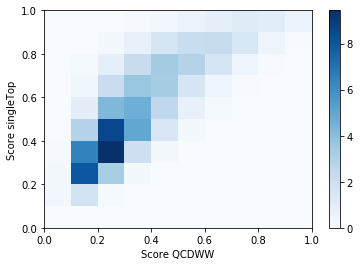

In [161]:
h = plt.hist2d(df.score_t0_v5,df.score_t1, cmap="Blues", bins=[10, 10], normed=True, range=((0, 1), (0,1)))
plt.xticks(np.arange(0,1.1,0.2))
plt.yticks(np.arange(0,1.1,0.2))
plt.xlabel("Score QCDWW")
plt.ylabel("Score singleTop")
plt.colorbar()
plt.show()

## Correlation matrix of the scores

In [97]:
df = get_df("w+jets_btag_val.root", nn_vars1)
a = np.array(df[[ 'score_t2', 'score_t1',"score_t0_v5", 'score_wjets_v5', "bveto_weights[1]"]])
b = a[:,:-1].T
w = a[:,-1].flatten()
c = np.cov(b, aweights=w)
var = c[[0,1,2,3], [0,1,2,3]][np.newaxis]
svar = np.sqrt(var.T * var)
corr = np.divide(c, svar)
print(corr)

[[1.         0.85033217 0.6460843  0.53939855]
 [0.85033217 1.         0.79213423 0.66630107]
 [0.6460843  0.79213423 1.         0.74918163]
 [0.53939855 0.66630107 0.74918163 1.        ]]


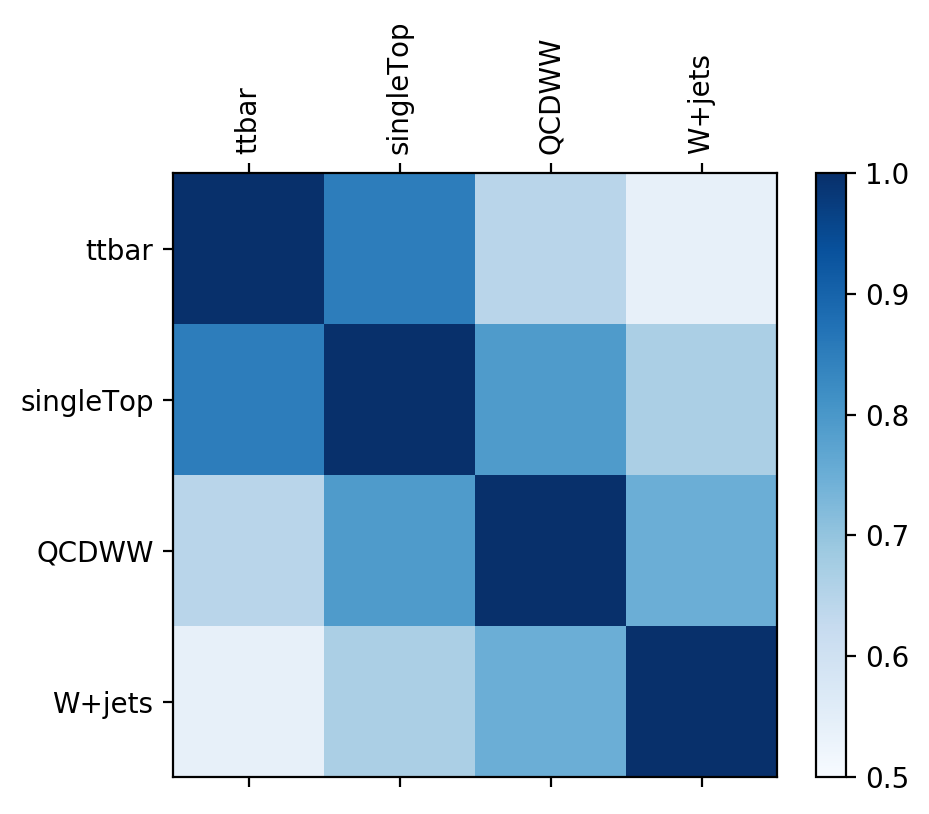

In [98]:
# Compute the correlation matrix for the received dataframe
fig, ax = plt.subplots(figsize=(5, 4), dpi=200)
cax = ax.matshow(corr, cmap='Blues', vmin=0.5, vmax= 1)
plt.xticks(range(corr.shape[0]), ["ttbar", "singleTop", 'QCDWW', "W+jets"], rotation=90);
plt.yticks(range(corr.shape[0]), ["ttbar", "singleTop", 'QCDWW', "W+jets"]);
# Add the colorbar legend
cbar = fig.colorbar(cax)
plt.show()